In [24]:
import torch

X = torch.randn(1000, 10)
y = torch.randint(0, 2, (1000, ))

len(y)

1000

In [25]:
# Train Test Split
X_train = X[:800]
X_val = X[800:900]
X_test = X[900:]

y_train = y[:800]
y_val = y[800:900]
y_test = y[900:]

In [27]:
X_train.shape

torch.Size([800, 10])

In [38]:
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torch.utils.data import Dataset

class NeuralNetwork(torch.nn.Module):
  def __init__(self, input_size, output_size):
    super().__init__()

    self.layers = torch.nn.Sequential(
        torch.nn.Linear(input_size, 100),
        torch.nn.ReLU(),

        torch.nn.Linear(100, 75),
        torch.nn.ReLU(),

        torch.nn.Linear(75, 50),
        torch.nn.ReLU(),

        torch.nn.Linear(50, output_size)
    )

  def forward(self, x):
    return self.layers(x)

class FakeDataset(Dataset):
  def __init__(self, X, y):
    self.X = X
    self.y = y

  def __getitem__(self, index):
    return self.X[index], self.y[index]

  def __len__(self):
    return len(self.X)

train_dataset = FakeDataset(X_train, y_train)
train_dataloader = DataLoader(train_dataset, batch_size=2, shuffle=True)

val_dataset = FakeDataset(X_val, y_val)
val_dataloader = DataLoader(val_dataset, batch_size = 2, shuffle = True)

test_dataset = FakeDataset(X_test, y_test)
test_dataloader = DataLoader(test_dataset, batch_size=2, shuffle=True)

model = NeuralNetwork(10, 2)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

model.to(device)

optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

epochs = 100

losses = []

for epoch in range(epochs):
  model.train()

  for batch_index, (features, label) in enumerate(train_dataloader):
    features, label = features.to(device), label.to(device)

    logits = model(features)

    loss = F.cross_entropy(logits, label)
    losses.append(loss)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # LOGGIN

    # print(f"Epochs: {epoch+1}, Batch: {batch_index+1}, Loss: {loss:.2f}")
  print(f"Epochs: {epoch+1}, Loss: {loss:.2f}")

def compute_accuracy(model, dataloader):
  model = model.eval()

  correct = 0.0
  total_examples = 0

  for idx, (features, labels) in enumerate(dataloader):
    with torch.no_grad():
      output = model(features)

    predictions = torch.argmax(output, dim = 1)

    compare = labels == predictions

    correct += torch.sum(compare)

    total_examples += len(compare)

  return (correct / total_examples).item()

Epochs: 1, Loss: 0.69
Epochs: 2, Loss: 0.71
Epochs: 3, Loss: 0.63
Epochs: 4, Loss: 0.71
Epochs: 5, Loss: 0.65
Epochs: 6, Loss: 0.72
Epochs: 7, Loss: 0.65
Epochs: 8, Loss: 0.67
Epochs: 9, Loss: 0.72
Epochs: 10, Loss: 0.71
Epochs: 11, Loss: 0.74
Epochs: 12, Loss: 0.85
Epochs: 13, Loss: 0.66
Epochs: 14, Loss: 0.90
Epochs: 15, Loss: 0.74
Epochs: 16, Loss: 0.84
Epochs: 17, Loss: 0.44
Epochs: 18, Loss: 0.47
Epochs: 19, Loss: 0.61
Epochs: 20, Loss: 0.62
Epochs: 21, Loss: 0.62
Epochs: 22, Loss: 0.37
Epochs: 23, Loss: 0.78
Epochs: 24, Loss: 1.12
Epochs: 25, Loss: 0.21
Epochs: 26, Loss: 0.33
Epochs: 27, Loss: 0.97
Epochs: 28, Loss: 0.46
Epochs: 29, Loss: 0.33
Epochs: 30, Loss: 0.25
Epochs: 31, Loss: 0.42
Epochs: 32, Loss: 0.27
Epochs: 33, Loss: 0.08
Epochs: 34, Loss: 0.18
Epochs: 35, Loss: 0.11
Epochs: 36, Loss: 0.64
Epochs: 37, Loss: 0.31
Epochs: 38, Loss: 0.10
Epochs: 39, Loss: 0.47
Epochs: 40, Loss: 0.08
Epochs: 41, Loss: 0.85
Epochs: 42, Loss: 0.00
Epochs: 43, Loss: 0.17
Epochs: 44, Loss: 0.

In [42]:
x = [i for i in range(len(losses))]
y = [loss.item() for loss in losses]

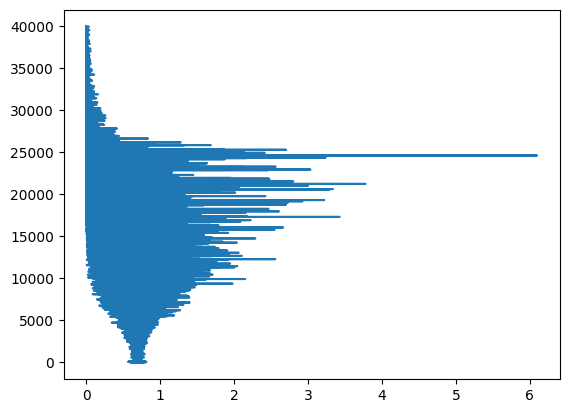

In [47]:
import matplotlib.pyplot as plt

plt.plot(y, x)

In [35]:
compute_accuracy(model, val_dataloader)

0.47999998927116394